In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:

df = pd.read_excel('data_slr.xlsx',sheet_name="data")

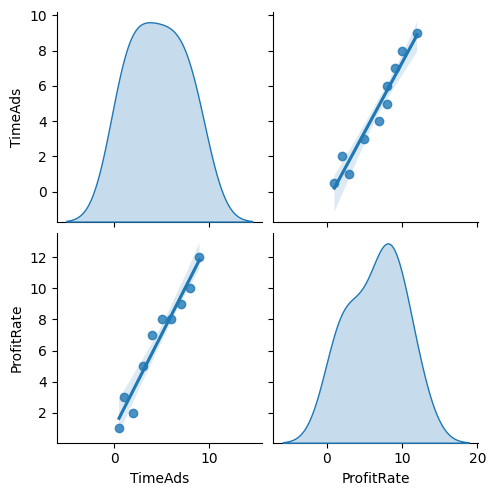

In [17]:
sns.pairplot(df[['TimeAds','ProfitRate']], 
             diag_kind='kde', kind='reg')
plt.show()

# Khảo sát mô hình hồi quy có tương quan không

In [18]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['TimeAds']].values # explanatory = feature
y = df[['ProfitRate']].values # reponse = target

In [19]:
# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [20]:
# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)

In [21]:
X_train 
# Input

array([[8.],
       [3.],
       [5.],
       [2.],
       [6.],
       [1.]])

In [22]:
# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model 

In [23]:
# Khai báo mô hình SLR
model = linear_model.LinearRegression()

In [24]:
# Huấn luyện mô hình 
model.fit(X_train,y_train)

LinearRegression()

In [25]:
import numpy as np
from sklearn import metrics

In [27]:
# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


In [28]:
print(model.intercept_) #b0
print(model.coef_) #b1

[1.215311]
[[1.14832536]]


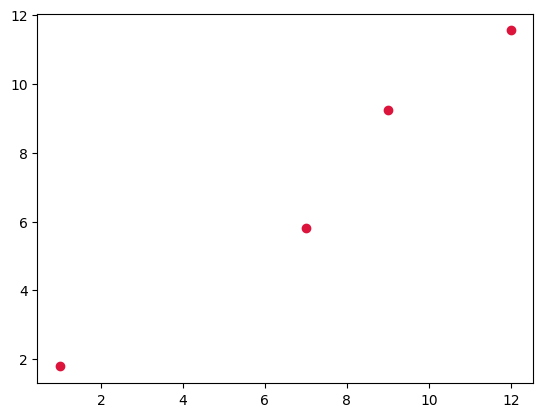

In [30]:
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

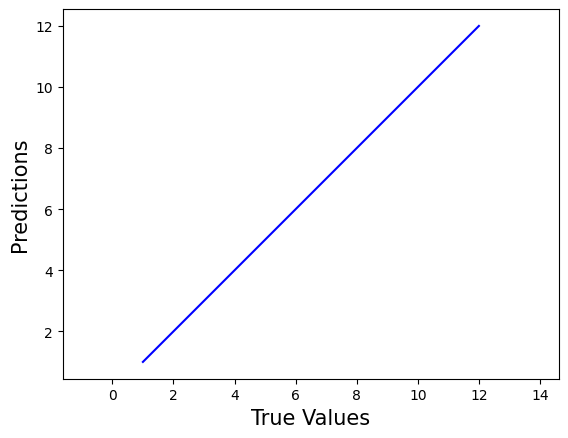

In [31]:
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

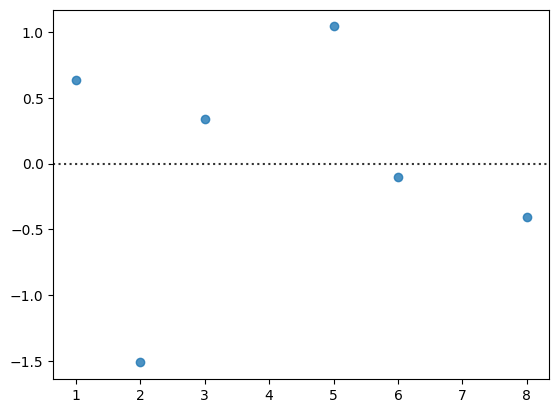

In [32]:

# (Train data set) Vẽ residual bằng Python
sns.residplot(x=X_train, y=y_train)
plt.show()